In [84]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

df_yearly = pd.read_csv("./data_v2/yearly/2019.csv")
df_test = pd.read_csv("./2019_test.csv")
df_train = pd.read_csv("./2019_train.csv")
df_train = df_train.drop(columns=['Unnamed: 0'])
df_test = df_test.drop(columns=['Unnamed: 0'])
df_train.head()

,Player,Tm,Pos,Age,Fumbles,FantasyPoints,TDs,YDs,Touches
0,Marcus Mariota,TEN,QB,26,3,85.02,7,1332,184
1,Damien Williams,KAN,RB,27,1,141.10,7,711,141
2,Peyton Barber,TAM,RB,25,1,114.50,7,585,170
3,Tyler Higbee,LAR,TE,26,0,160.40,3,734,69
4,DeVante Parker,MIA,WR,26,0,246.20,9,1202,72


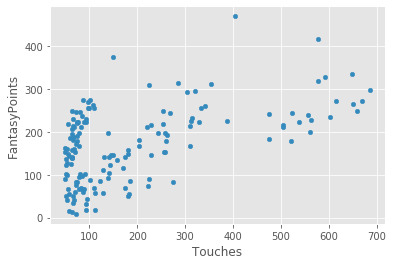

In [85]:
# plot to see the correlation between the number of times a plyaer touches the ball to the amount of FP
plt.style.use('ggplot')
df_train.plot(x='Touches', y='FantasyPoints', kind='scatter')

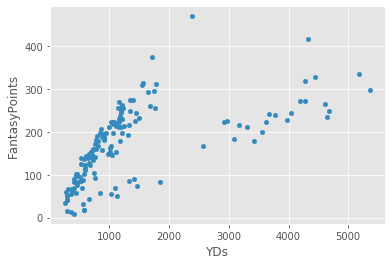

In [86]:
plt.style.use('ggplot')
df_train.plot(x='YDs', y='FantasyPoints', kind='scatter')

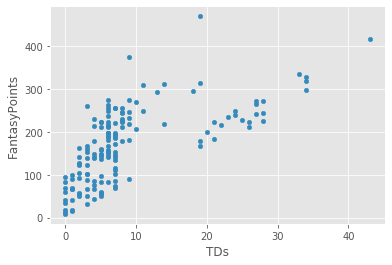

In [87]:
plt.style.use('ggplot')
df_train.plot(x='TDs', y='FantasyPoints', kind='scatter')

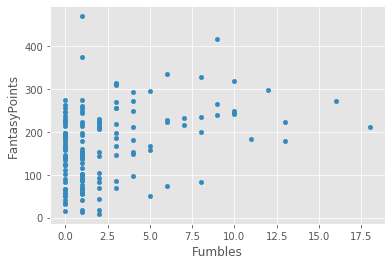

In [88]:
plt.style.use('ggplot')
df_train.plot(x='Fumbles', y='FantasyPoints', kind='scatter')

In [89]:
#set up x and y for skillpos
x_train = df_train.drop(columns=['Player','Tm', 'Pos', 'Age', 'FantasyPoints']).to_numpy()
x_test = df_test.drop(columns=['Player', 'Tm', 'Pos', 'Age', 'FantasyPoints']).to_numpy()

y_test = df_test['FantasyPoints'].to_numpy()
y_train = df_train['FantasyPoints'].to_numpy()

In [90]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

y_pred = regr.predict(x_test)

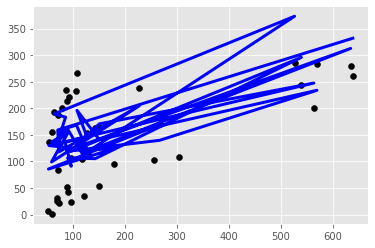

In [92]:
# Plot outputs
plt.scatter(x_test[:,-1:], y_test,  color='black')
plt.plot(x_test[:,-1:], y_pred, color='blue', linewidth=3)

plt.show()